# Automation of Experimental Modal Analysis Using Bayesian Optimization (AutoEMA)
[DOWNLOAD THE PAPER](https://www.mdpi.com/2076-3417/13/2/949/pdf?version=1673514238)

Implementation of the paper "Automation of Experimental Modal Analysis Using Bayesian Optimization". For further information, please check the publication. 
Cite as:
```
@Article{ellinger2023autoema,
    AUTHOR = {Ellinger, Johannes and Beck, Leopold and Benker, Maximilian and Hartl, Roman and Zaeh, Michael F.},
    TITLE = {Automation of Experimental Modal Analysis Using Bayesian Optimization},
    JOURNAL = {Applied Sciences},
    VOLUME = {13},
    YEAR = {2023},
    NUMBER = {2},
    ARTICLE-NUMBER = {949},
    URL = {https://www.mdpi.com/2076-3417/13/2/949},
    ISSN = {2076-3417},
    ABSTRACT = {The dynamic characterization of structures by means of modal parameters offers many valuable insights into the vibrational behavior of these structures. However, modal parameter estimation has traditionally required expert knowledge and cumbersome manual effort such as, for example, the selection of poles from a stabilization diagram. Automated approaches which replace the user inputs with a set of rules depending on the input data set have been developed to address this shortcoming. This paper presents an alternative approach based on Bayesian optimization. This way, the possible solution space for the modal parameter estimation is kept as widely open as possible while ensuring a high accuracy of the final modal model. The proposed approach was validated on both a synthetic test data set and experimental modal analysis data of a machine tool. Furthermore, it was benchmarked against a similar tool from a well-known numerical computation software application.},
    DOI = {10.3390/app13020949}
}
```

# Installation

Pip is recommended to install this package. See [this](https://pip.pypa.io/en/stable/installation/) for more information.

```
pip install autoema
```

# Quick start
Import the package and load the example:

In [1]:
from AutoEMA import AutoEMA as ae

Initializing the OptimizationModel (OptModel) and optimize it:

In [2]:
frf, f = ae.load_example() 
model = ae.OptModel(frf=frf, f_axis=f) 
model.optimize(n_init=2, n_iter=2)  # Do more iterations on real data 

|   iter    |  target   |   dist    | err_ceta  |  err_fn   | max_ceta  | max_norm  | min_poles |   n_max   |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.7799   |  1.901    |  0.158    |  0.001011 |  0.2302   |  0.2027   |  0.2369   |  71.18    |
|  2        |  0.7799   |  1.644    |  0.1095   |  0.05434  |  0.2419   |  0.5797   |  0.2818   |  112.7    |
|  3        |  0.7799   |  2.281    |  0.09488  |  0.03839  |  0.2495   |  0.6356   |  0.5874   |  72.3     |
|  4        |  0.7799   |  0.5249   |  0.1351   |  0.01548  |  0.2752   |  0.1158   |  0.2957   |  66.13    |


Visualize the result by plotting the stability diagram:

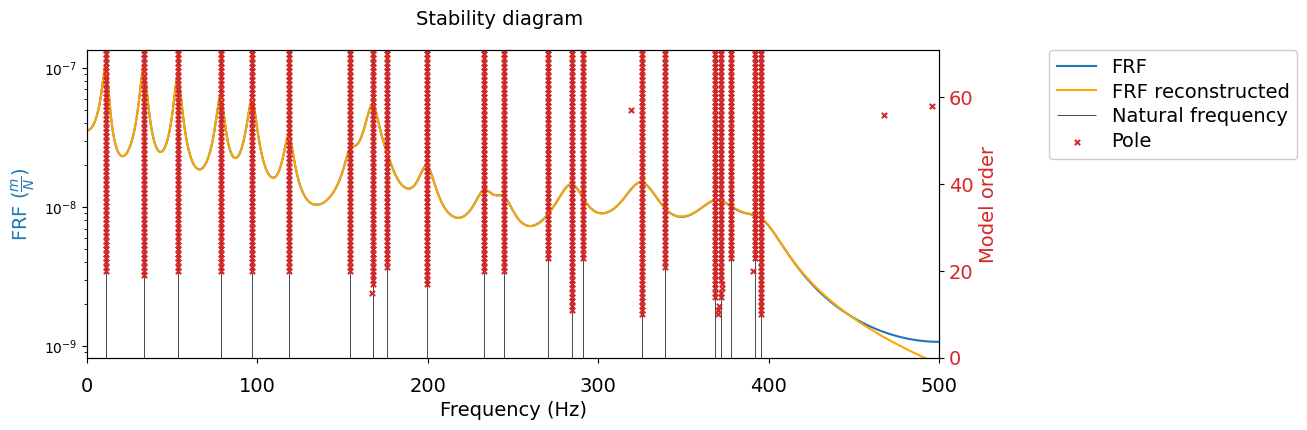

In [3]:
_ = model.plot_stability_diagram() 

Visualize the damping ratios:

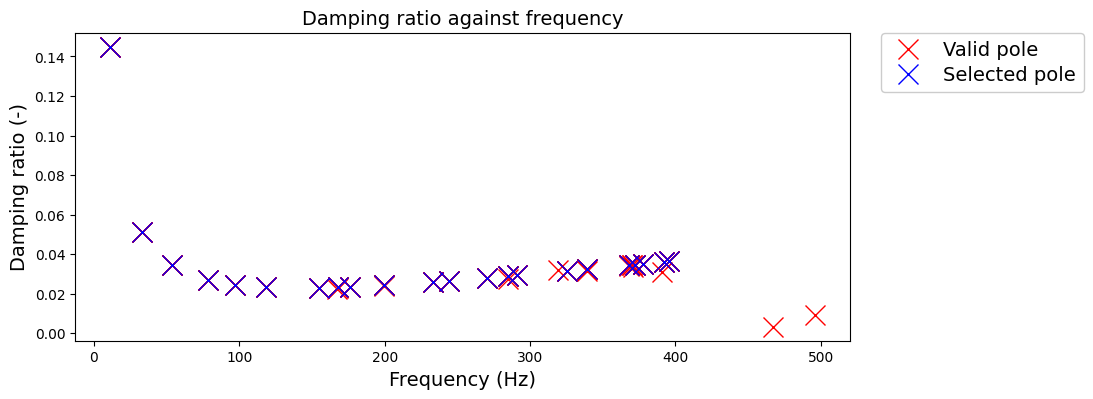

In [4]:
model.plot_damping_ratios()

Print the results of the optimized modal analysis:

In [5]:
print(model)

Model order: 22
FRAC: 100.0%
Natural frequencies: ['11.2', '33.3', '53.4', '78.4', '96.9', '118.4', '154.6', '167.6', '176.3', '199.4', '233.0', '244.5', '270.3', '284.7', '290.7', '325.3', '338.9', '368.2', '372.1', '377.8', '391.8', '395.4']
Damping ratios: ['0.145', '0.051', '0.035', '0.027', '0.025', '0.023', '0.023', '0.023', '0.024', '0.024', '0.026', '0.027', '0.028', '0.029', '0.029', '0.032', '0.032', '0.034', '0.035', '0.035', '0.036', '0.036']


Get the modal parameters:

In [6]:
reconstructed_frf, freq_axis, nat_freqs, damp_ratios, mode_shapes = model.get_results() 
FRAC = model.get_frac() 

Have a look at the optimized parameter:

In [7]:
optimized_params = model.params
print(optimized_params)

{'n_max': 71, 'err_fn': 0.0010113231069171437, 'err_ceta': 0.15804867401632372, 'min_ceta': 0, 'max_ceta': 0.23023325726318397, 'dist': 1.9012792169292663, 'min_poles': 0.23693543790751914, 'max_norm': 0.20272912357197914}


Using the same optimized parameters for another modal analysis without optimizing again:

In [8]:
bmodel = ae.BaseModel(frf=frf, f_axis=f, params=optimized_params)
bmodel.run()
print(bmodel)

Model order: 22
FRAC: 100.0%
Natural frequencies: ['11.2', '33.3', '53.4', '78.4', '96.9', '118.4', '154.6', '167.6', '176.3', '199.4', '233.0', '244.5', '270.3', '284.7', '290.7', '325.3', '338.9', '368.2', '372.1', '377.8', '391.8', '395.4']
Damping ratios: ['0.145', '0.051', '0.035', '0.027', '0.025', '0.023', '0.023', '0.023', '0.024', '0.024', '0.026', '0.027', '0.028', '0.029', '0.029', '0.032', '0.032', '0.034', '0.035', '0.035', '0.036', '0.036']


## Advanced
Play around with the regularization parameter when optimizing the model. An increasing regularization parameter leads to a lower model order.

In [9]:
model = ae.OptModel(frf=frf, f_axis=f, reg=0.1, show_progress=False) 
model.optimize(n_init=10, n_iter=10)
print(model)

Model order: 20
FRAC: 100.0%
Natural frequencies: ['11.2', '33.3', '53.4', '78.4', '96.9', '118.4', '154.6', '167.6', '176.3', '199.4', '233.0', '244.5', '270.3', '284.7', '290.7', '325.3', '338.9', '370.2', '377.8', '393.7']
Damping ratios: ['0.145', '0.051', '0.035', '0.027', '0.025', '0.023', '0.023', '0.023', '0.024', '0.024', '0.026', '0.027', '0.028', '0.029', '0.029', '0.032', '0.032', '0.034', '0.035', '0.036']
